In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<AxesSubplot:title={'center':'Labels Frequency'}>

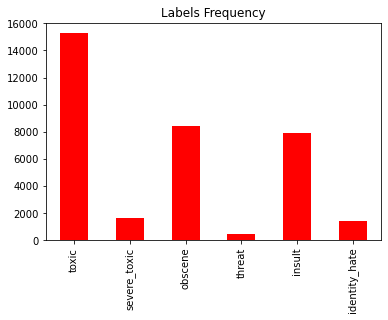

In [32]:
train = pd.read_csv("train.csv")
# Label Frequency
train_labels = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency', color='Red')

<AxesSubplot:>

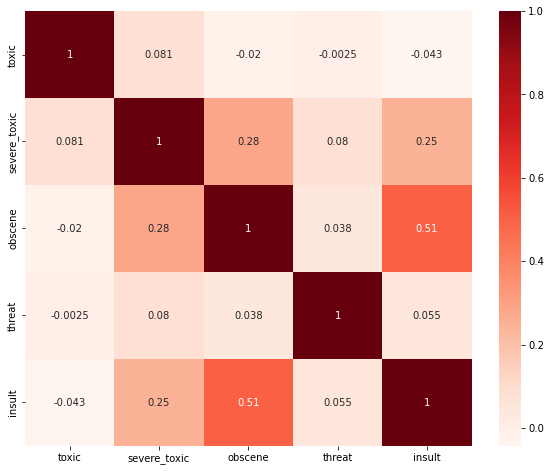

In [33]:
# Correlation between each labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Reds")

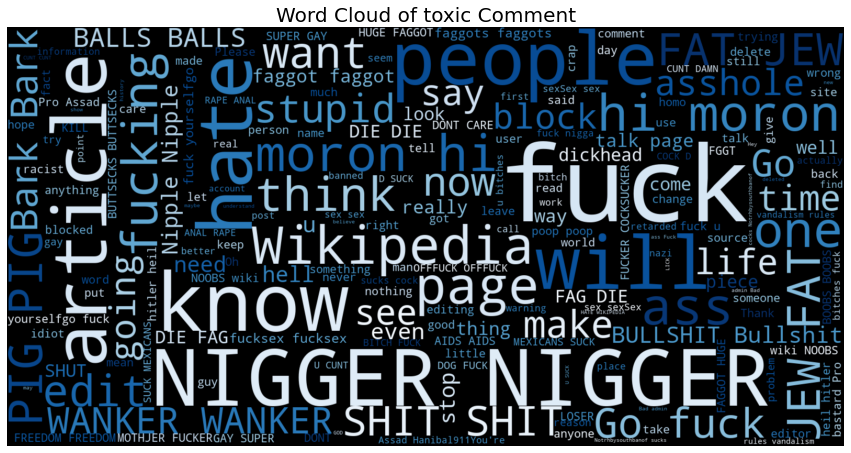

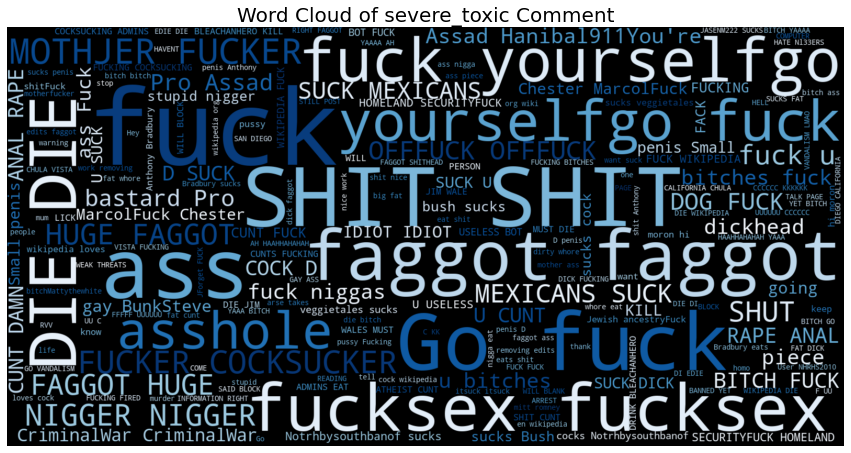

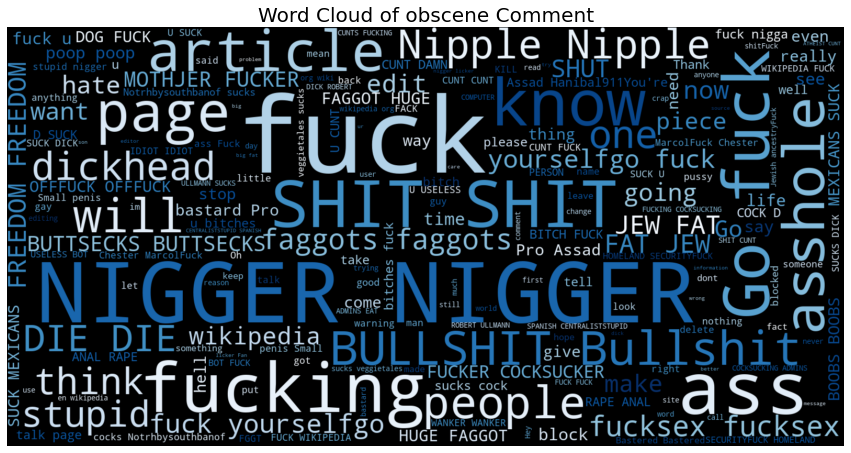

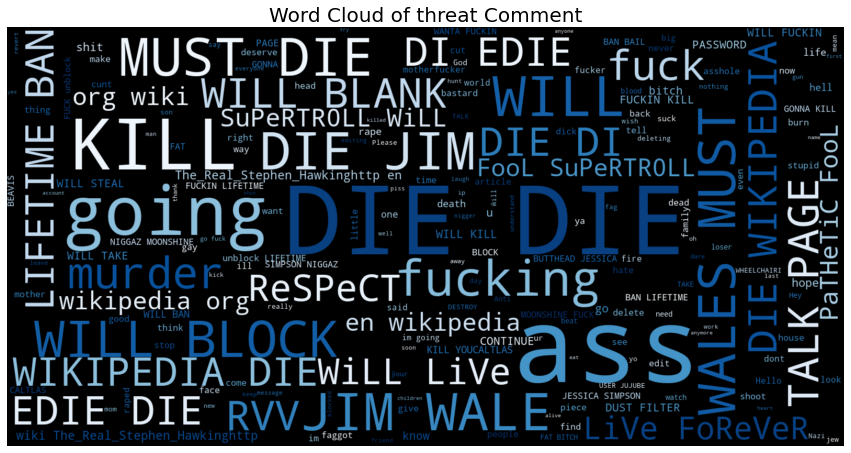

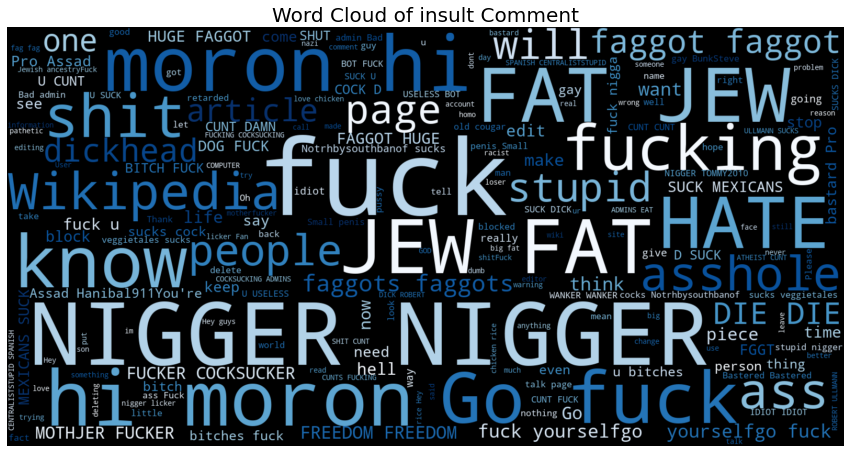

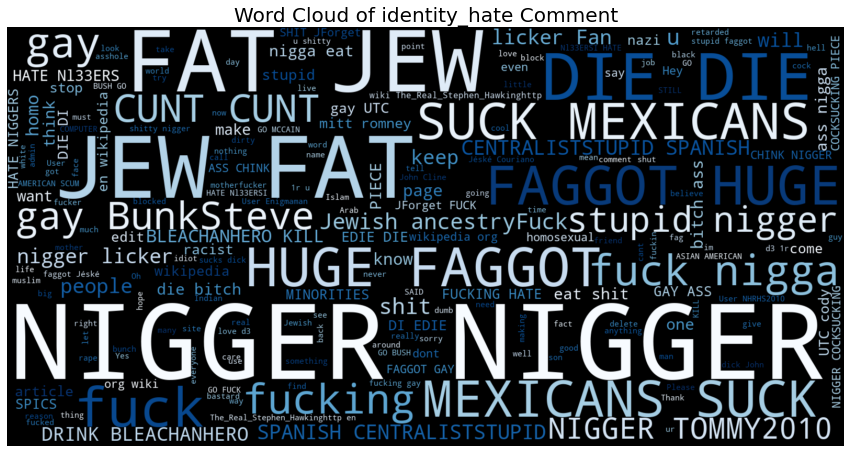

In [35]:
# Word Cloud of each label
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of {token} Comment", size=20)
    plt.show()


token_toxic = 'toxic'
token_severe_toxic = 'severe_toxic'
token_obscene = 'obscene'
token_threat = 'threat'
token_insult = 'insult'
token_identity_hate = 'identity_hate'

W_Cloud(token.lower())
W_Cloud(token_severe_toxic.lower())
W_Cloud(token_obscene.lower())
W_Cloud(token_threat.lower())
W_Cloud(token_insult.lower())
W_Cloud(token_identity_hate.lower())